# 경사하강법과 손실 함수

## Cross Entropy
하나의 변수가 가질 수 있는 서로 다른 분포(p,q)를 가질 경우 해당 분포들의 차이를 의미

In [1]:
import numpy as np

def crossEntropyError(s, l):
    return -np.sum(l*np.log(s))

s = np.array([0.7, 0.2, 0.1])
l = np.array([1, 0, 0])

ce = crossEntropyError(s, l)
print(ce)

0.35667494393873245


cross entropy를 계산할 때 log에 0이 전달된다면 log(0)는 -inf가 된다. 

In [2]:
s = np.array([0, 1, 0])
l = np.array([1, 0, 0])
ce = crossEntropyError(s, l)
print(ce)

nan


C:\Users\isc03\AppData\Local\Temp\ipykernel_6616\1009463558.py:4: RuntimeWarning: divide by zero encountered in log
  return -np.sum(l*np.log(s))
C:\Users\isc03\AppData\Local\Temp\ipykernel_6616\1009463558.py:4: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(l*np.log(s))


In [3]:
-np.log(0)

C:\Users\isc03\AppData\Local\Temp\ipykernel_6616\2869289095.py:1: RuntimeWarning: divide by zero encountered in log
  -np.log(0)


inf

따라서 이것을 제어할 delta 변수를 설정해야 한다. 로그에 아주 작은 값을 추가해 실행하면 오류가 발생하지 않는다.

In [4]:
# 개선된 cross entropy
def crossEntropyError(s, l):
    delta = 1e-10
    return -np.sum(l*np.log(s+delta))

s = np.array([0, 1, 0])
l = np.array([1, 0, 0])
ce = crossEntropyError(s, l)
print(ce)

23.025850929940457


In [5]:
s = np.array([0.7, 0.2, 0.1])
l = np.array([1, 0, 0])

ce = crossEntropyError(s, l)
print(ce) # 오리자날 함수로 계산한 결과 0.35667494393873245

0.3566749437958753


크로스엔트로피의 그래프를 그려보자.


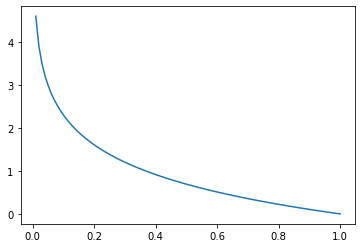

In [6]:
s_arr = np.arange(0.01, 1.01, 0.01)
l_arr = np.array(len(s_arr) * [1])
results = []

for s, l in zip(s_arr, l_arr):
    results.append(crossEntropyError(s, l))

import matplotlib.pyplot as plt
plt.plot(s_arr, results)

## 연습 문제
다음 내용을 참조해 신경망을 구성하고 h, output, error, error_term, del_w를 구하라.

- 입력값은 [0.5, -0.3], 가중치는 [0.4, 0.6], 실제 값은 0.5, 학습률은 0.1
- h : 가중치 연산 후 출력
- output : 시그모이드 함수 적용 후 output
- error : 실제 값에서 연산 값(output)을 감산
- error_term : error와 h의 기울기 곱셈
- del_w : 학습률 * error_term * x


In [7]:
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))

# 파라미터 정의
inputs = np.array([0.5, -0.3])
weights = np.array([0.4, 0.6])
true_y = 0.5
learning_rate = 0.1

h = np.dot(inputs, weights) # w*x
output = sigmoid(h) # sigmoid(w*x) => pred_y
error = abs(true_y - output) # 잔차
error_term = error * sigmoid_prime(h) # error * pred_y의 미분
del_w = learning_rate * error_term * inputs


print("가중치 연산 후 출력:", h)
print("시그모이드 적용 후:", output)
print("error:", error)
print("error_term:", error_term)
print("del_w:", del_w)

가중치 연산 후 출력: 0.020000000000000018
시그모이드 적용 후: 0.5049998333399998
error: 0.00499983333999976
error_term: 0.0012498333474990232
del_w: [ 6.24916674e-05 -3.74950004e-05]


In [8]:
weights - del_w # 업데이트

array([0.39993751, 0.6000375 ])

loss: 0.00499983333999976
loss: 0.003937560252352368
loss: 0.003100922235307113
loss: 0.0024420219454585057
loss: 0.001923114594782227
loss: 0.0015144636407333767
loss: 0.001192645439168305
loss: 0.0009392108825478918
loss: 0.000739629839398348
loss: 0.0005824591184663275
loss: 0.0004586868585553239
loss: 0.00036121604897398907
loss: 0.0002844577107787849
loss: 0.00022401048250453304
loss: 0.00017640827219544963
loss: 0.00013892152276517855
loss: 0.00010940070328546714
loss: 8.615305584347421e-05
loss: 6.784553245642311e-05
loss: 5.3428357287943484e-05
loss: 4.2074831597904705e-05
loss: 3.3133929997597455e-05
loss: 2.609296992883703e-05
loss: 2.0548213846116603e-05
loss: 1.6181718417107582e-05
loss: 1.2743103260048905e-05
loss: 1.0035193820479016e-05
loss: 7.902715135066352e-06
loss: 6.22338816969048e-06
loss: 4.900918184058689e-06
loss: 3.8594730700225455e-06
loss: 3.039335042753777e-06
loss: 2.3934763462296615e-06
loss: 1.8848626226475318e-06
loss: 1.484329315348809e-06
loss: 1.16890

<AxesSubplot:>

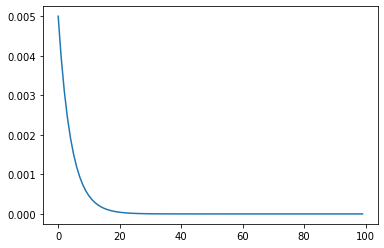

In [10]:
import pandas as pd

# 파라미터 정의
inputs = np.array([0.5, -0.3])
weights = np.array([0.4, 0.6])
true_y = 0.5
learning_rate = 0.1

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))

learning_rate =  10
err_list = [] # histroy 백업용

for i in range(100): # epoch
    h = np.dot(inputs, weights)
    output = sigmoid(h) # 출력값
    error = abs(true_y - output) # 오차 계산
    error_term = error * sigmoid_prime(h) # 에러텀 확인
    del_w = learning_rate * error_term * inputs # 얼마만큼 Weight를 업데이트할지...
    weights -= del_w # 업데이트 
    err_list.append(error)
    print("loss:", error)
    
pd.Series(err_list).plot()

In [12]:
sigmoid(np.dot(inputs, weights)), true_y

(0.5000000000002109, 0.5)